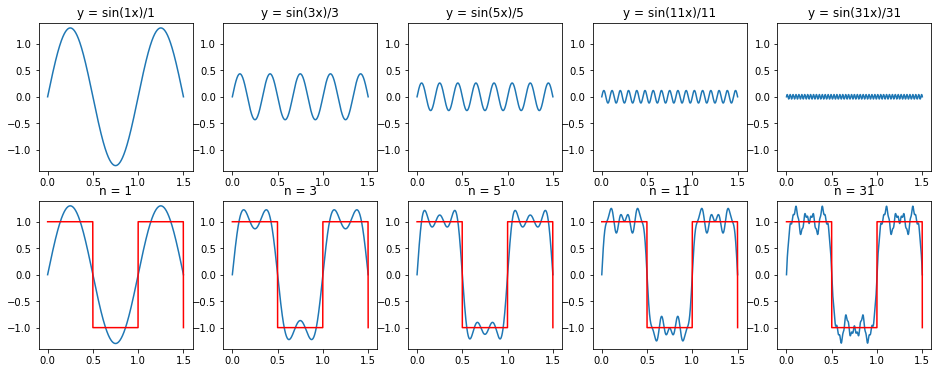

In [2]:
#dia 3: square wave

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 2.0*np.pi*1.5, 1000)

y1 = 1.3*np.sin(x)
y2 = 1.3*np.sin(3.0*x)/3.0
y3 = 1.3*np.sin(5.0*x)/5.0
y4 = 1.3*np.sin(11.0*x)/11.0
y5 = 1.3*np.sin(31.0*x)/31.0

square = signal.square(x)

fig, axs = plt.subplots(2, 5, figsize=(16,6))

t = np.linspace(0.0, 1.5, 1000)

axs[0,0].plot(t,y1)
axs[0,0].set_title("y = sin(1x)/1")
axs[0,1].plot(t,y2)
axs[0,1].set_title("y = sin(3x)/3")
axs[0,2].plot(t,y3)
axs[0,2].set_title("y = sin(5x)/5")
axs[0,3].plot(t,y4)
axs[0,3].set_title("y = sin(11x)/11")
axs[0,4].plot(t,y5)
axs[0,4].set_title("y = sin(31x)/31")

axs[1,0].plot(t,y1)
axs[1,0].plot(t,square, color='r')
axs[1,0].set_title("n = 1")

axs[1,1].plot(t,y1+y2)
axs[1,1].plot(t,square, color='r')
axs[1,1].set_title("n = 3")

axs[1,2].plot(t,y1+y2+y3)
axs[1,2].plot(t,square, color='r')
axs[1,2].set_title("n = 5")

axs[1,3].plot(t,y1+y2+y3+y4)
axs[1,3].plot(t,square, color='r')
axs[1,3].set_title("n = 11")

axs[1,4].plot(t,y1+y2+y3+y4+y5)
axs[1,4].plot(t,square, color='r')
axs[1,4].set_title("n = 31")

for ax in axs.flatten():
    ax.set_ylim(-1.4, 1.4)
    ax.set_xlim(-0.1, 1.6)

plt.show()

In [75]:
#dia 46: custom LPC and HPC filter functions

from numpy.fft import (fft2, ifft2, fftshift)

def lpcfilter(shape, ftype='ideal', D0 = 0, n=1, center=(0,0)):
    """
    Generate low pass circular filter H in the frequency domain
    shape: shape of the filter, 
    ftype: type of the filter: 'ideal', 'gaussian' or 'butterworth', 
    DO: range of the filter frame
    n: order of the butterworth filter, 
    center: shift of the center point of the filter relative to the center of the frequency rectangle 
    """
    r,c = shape
    R,C = np.ogrid[:r,:c]
    H = np.zeros((r,c))
    D = np.sqrt((R -  r//2 + center[0])**2 + (C -  c//2 + center[1])**2)
    
    if ftype == 'ideal':
        #all pixels within radius set to 1.0
        H[D < D0] = 1.0
    elif ftype == 'gaussian':
        H = np.exp(-(D)**2/(2*(D0)**2))
    elif ftype == 'butterworth':
        H = 1/(1 + (D/D0)**(2*n))
    
    return H
    
def hpcfilter(shape, ftype='ideal', D0 = 0, n=1, center=(0,0)):
    """
    Generate low pass circular filter H in the frequency domain
    """
    H = 1 - lpcfilter(shape, ftype = ftype, D0 = D0, n = n, center = center) 
    
    return H
    

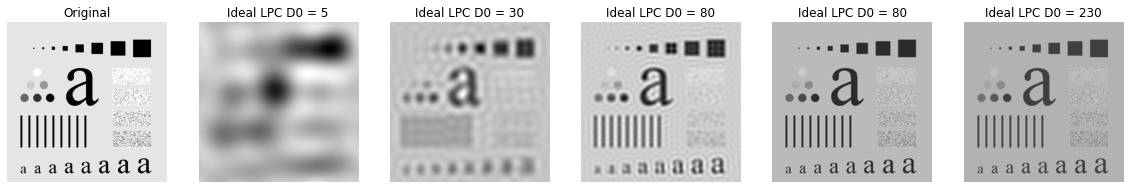

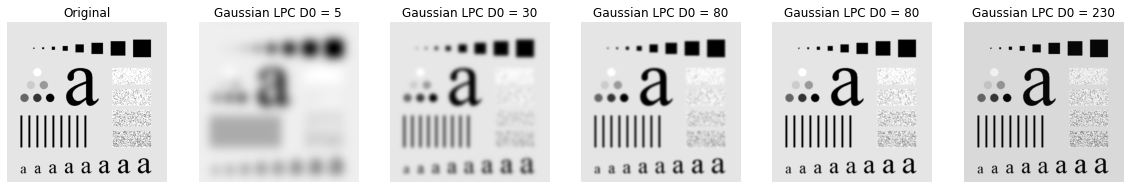

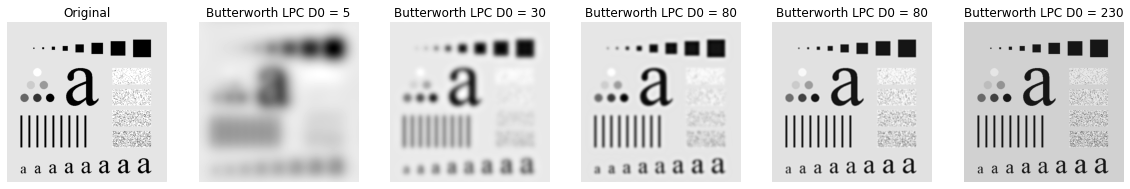

In [76]:
#test of LPC

import cv2

letter = cv2.imread('.\imgs\LetterA.tif', cv2.cv2.IMREAD_GRAYSCALE)
F = fftshift(fft2(letter))

ideal_5 = lpcfilter(letter.shape, ftype='ideal', D0 = 5)
ideal_5 = np.real(ifft2(fftshift(F*ideal_5), letter.shape))

ideal_15 = lpcfilter(letter.shape, ftype='ideal', D0 = 15)
ideal_15 = np.real(ifft2(fftshift(F*ideal_15), letter.shape))

ideal_30 = lpcfilter(letter.shape, ftype='ideal', D0 = 30)
ideal_30 = np.real(ifft2(fftshift(F*ideal_30), letter.shape))

ideal_80 = lpcfilter(letter.shape, ftype='ideal', D0 = 80)
ideal_80 = np.real(ifft2(fftshift(F*ideal_80), letter.shape))

ideal_230 = lpcfilter(letter.shape, ftype='ideal', D0 = 230)
ideal_230 = np.real(ifft2(fftshift(F*ideal_230), letter.shape))

fig, axes = plt.subplots(ncols=6, figsize=(20, 5))
ax = axes.ravel()
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(ideal_5, cmap='gray')
ax[1].set_title('Ideal LPC D0 = 5')
ax[2].imshow(ideal_15, cmap='gray')
ax[2].set_title('Ideal LPC D0 = 30')
ax[3].imshow(ideal_30, cmap='gray')
ax[3].set_title('Ideal LPC D0 = 80')
ax[4].imshow(ideal_80, cmap='gray')
ax[4].set_title('Ideal LPC D0 = 80')
ax[5].imshow(ideal_230, cmap='gray')
ax[5].set_title('Ideal LPC D0 = 230')
plt.show()

gaussian_5 = lpcfilter(letter.shape, ftype='gaussian', D0 = 5)
gaussian_5 = np.real(ifft2(fftshift(F*gaussian_5), letter.shape))

gaussian_15 = lpcfilter(letter.shape, ftype='gaussian', D0 = 15)
gaussian_15 = np.real(ifft2(fftshift(F*gaussian_15), letter.shape))

gaussian_30 = lpcfilter(letter.shape, ftype='gaussian', D0 = 30)
gaussian_30 = np.real(ifft2(fftshift(F*gaussian_30), letter.shape))

gaussian_85 = lpcfilter(letter.shape, ftype='gaussian', D0 = 85)
gaussian_85 = np.real(ifft2(fftshift(F*gaussian_85), letter.shape))

gaussian_230 = lpcfilter(letter.shape, ftype='gaussian', D0 = 230)
gaussian_230 = np.real(ifft2(fftshift(F*gaussian_230), letter.shape))

fig, axes = plt.subplots(ncols=6, figsize=(20, 5))
ax = axes.ravel()
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(gaussian_5, cmap='gray')
ax[1].set_title('Gaussian LPC D0 = 5')
ax[2].imshow(gaussian_15, cmap='gray')
ax[2].set_title('Gaussian LPC D0 = 30')
ax[3].imshow(gaussian_30, cmap='gray')
ax[3].set_title('Gaussian LPC D0 = 80')
ax[4].imshow(gaussian_85, cmap='gray')
ax[4].set_title('Gaussian LPC D0 = 80')
ax[5].imshow(gaussian_230, cmap='gray')
ax[5].set_title('Gaussian LPC D0 = 230')
plt.show()

butterworth_5 = lpcfilter(letter.shape, ftype='butterworth', n=2, D0 = 5)
butterworth_5 = np.real(ifft2(fftshift(F*butterworth_5), letter.shape))

butterworth_15 = lpcfilter(letter.shape, ftype='butterworth', n=2, D0 = 15)
butterworth_15 = np.real(ifft2(fftshift(F*butterworth_15), letter.shape))

butterworth_30 = lpcfilter(letter.shape, ftype='butterworth', n=2, D0 = 30)
butterworth_30 = np.real(ifft2(fftshift(F*butterworth_30), letter.shape))

butterworth_80 = lpcfilter(letter.shape, ftype='butterworth', n=2, D0 = 80)
butterworth_80 = np.real(ifft2(fftshift(F*butterworth_80), letter.shape))

butterworth_230 = lpcfilter(letter.shape, ftype='butterworth', n=2, D0 = 230)
butterworth_230 = np.real(ifft2(fftshift(F*butterworth_230), letter.shape))

fig, axes = plt.subplots(ncols=6, figsize=(20, 5))
ax = axes.ravel()
plt.axis('off')
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(butterworth_5, cmap='gray')
ax[1].set_title('Butterworth LPC D0 = 5')
ax[2].imshow(butterworth_15, cmap='gray')
ax[2].set_title('Butterworth LPC D0 = 30')
ax[3].imshow(butterworth_30, cmap='gray')
ax[3].set_title('Butterworth LPC D0 = 80')
ax[4].imshow(butterworth_80, cmap='gray')
ax[4].set_title('Butterworth LPC D0 = 80')
ax[5].imshow(butterworth_230, cmap='gray')
ax[5].set_title('Butterworth LPC D0 = 230')
plt.show()

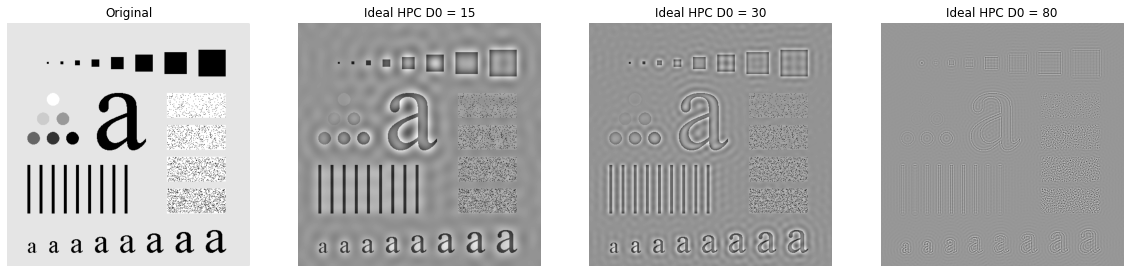

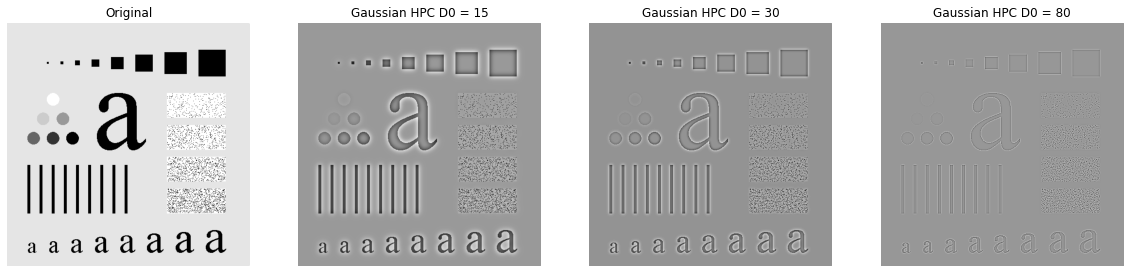

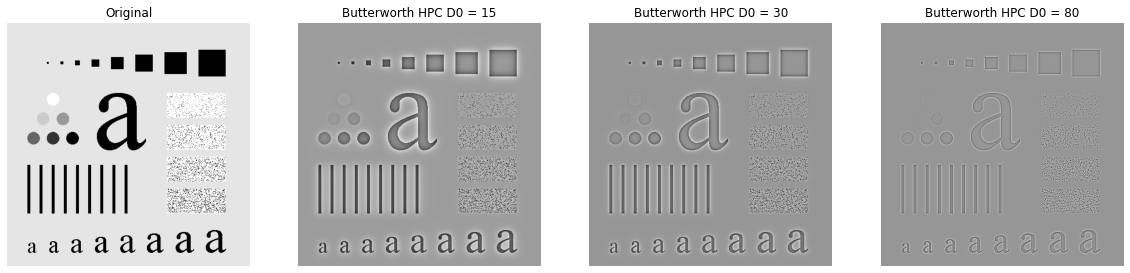

In [77]:
#test of HPC

ideal_15 = hpcfilter(letter.shape, ftype='ideal', D0 = 15)
ideal_15 = np.real(ifft2(fftshift(F*ideal_15), letter.shape))

ideal_30 = hpcfilter(letter.shape, ftype='ideal', D0 = 30)
ideal_30 = np.real(ifft2(fftshift(F*ideal_30), letter.shape))

ideal_80 = hpcfilter(letter.shape, ftype='ideal', D0 = 80)
ideal_80 = np.real(ifft2(fftshift(F*ideal_80), letter.shape))

fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes.ravel()
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(ideal_15, cmap='gray')
ax[1].set_title('Ideal HPC D0 = 15')
ax[2].imshow(ideal_30, cmap='gray')
ax[2].set_title('Ideal HPC D0 = 30')
ax[3].imshow(ideal_80, cmap='gray')
ax[3].set_title('Ideal HPC D0 = 80')
plt.show()

gaussian_15 = hpcfilter(letter.shape, ftype='gaussian', D0 = 15)
gaussian_15 = np.real(ifft2(fftshift(F*gaussian_15), letter.shape))

gaussian_30 = hpcfilter(letter.shape, ftype='gaussian', D0 = 30)
gaussian_30 = np.real(ifft2(fftshift(F*gaussian_30), letter.shape))

gaussian_80 = hpcfilter(letter.shape, ftype='gaussian', D0 = 85)
gaussian_80 = np.real(ifft2(fftshift(F*gaussian_80), letter.shape))


fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes.ravel()
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(gaussian_15, cmap='gray')
ax[1].set_title('Gaussian HPC D0 = 15')
ax[2].imshow(gaussian_30, cmap='gray')
ax[2].set_title('Gaussian HPC D0 = 30')
ax[3].imshow(gaussian_80, cmap='gray')
ax[3].set_title('Gaussian HPC D0 = 80')
plt.show()

butterworth_15 = hpcfilter(letter.shape, ftype='butterworth', D0 = 15)
butterworth_15 = np.real(ifft2(fftshift(F*butterworth_15), letter.shape))

butterworth_30 = hpcfilter(letter.shape, ftype='butterworth', D0 = 30)
butterworth_30 = np.real(ifft2(fftshift(F*butterworth_30), letter.shape))

butterworth_80 = hpcfilter(letter.shape, ftype='butterworth', D0 = 80)
butterworth_80 = np.real(ifft2(fftshift(F*butterworth_80), letter.shape))

fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes.ravel()
[axi.set_axis_off() for axi in ax.ravel()]
ax[0].imshow(letter, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(butterworth_15, cmap='gray')
ax[1].set_title('Butterworth HPC D0 = 15')
ax[2].imshow(butterworth_30, cmap='gray')
ax[2].set_title('Butterworth HPC D0 = 30')
ax[3].imshow(butterworth_80, cmap='gray')
ax[3].set_title('Butterworth HPC D0 = 80')
plt.show()

(-0.5, 601.5, 417.5, -0.5)

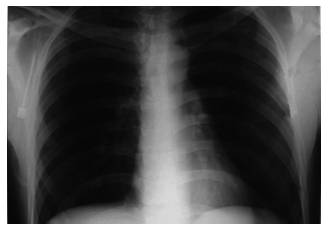

In [78]:
#dia 51: High frequency emphasis filtering and histogram equalization for image enhancement

img = cv2.imread('./imgs/ChestXray.tif')

plt.imshow(img, cmap='gray')
plt.axis('off')

